In [2]:
import sympy as sym
sym.init_printing()

In [3]:
# from sympy.functions.elementary.miscellaneous import sqrt
# from sympy.functions.elementary.exponential import exp
# from sympy.functions.combinatorial.factorials import factorial

# Define basis and test functions
# Usage: psi(n, xi)
class psi(sym.Function):
    @classmethod
    def eval(cls, n, xi):
        #return 1/sym.sqrt( sym.pi * sym.Pow(2, n) * sym.factorial(n) ) * sym.hermite(n, xi) * sym.exp( -xi**2 )
        return None

    def doit(self):
        n, xi = self.args
        return 1/sym.sqrt( sym.pi * sym.Pow(2, n) * sym.factorial(n) ) * sym.hermite(n, xi) * sym.exp( -xi**2 )
        
    def _latex(self, printer):
        n, xi = self.args
        return r'\Psi_{%s}(%s)' % (printer._print(n), printer._print(xi))
        
class psi_dual(sym.Function):
    @classmethod
    def eval(cls, n, xi):
        # return 1/sym.sqrt( sym.Pow(2, n) * sym.factorial(n) ) * sym.hermite(n, xi)
        return None

    def doit(self):
        n, xi = self.args
        return 1/sym.sqrt( sym.Pow(2, n) * sym.factorial(n) ) * sym.hermite(n, xi)
    
    def _latex(self, printer):
        n, xi = self.args
        return r'\Psi^{%s}(%s)' % (printer._print(n), printer._print(xi))

class xi(sym.Function):
    @classmethod
    def eval(cls, v, u, alpha):
        return None

    def doit(self):
        v, u, alpha = self.args
        return (v - u) / alpha

    # def _latex(self, printer):
    #     v, u, alpha = self.args
    #     return r'\xi'

class Coefficient(sym.Function):
    @classmethod
    def eval(cls, n, m, p, x, y, z, t):
        return None
    
    def _latex(self, printer):
        n, m, p, x, y, z, t = self.args
        return r'C_{%s,%s,%s}' % (printer._print(n), printer._print(m), printer._print(p))

# Full system by individual terms

In [4]:
# Define symbols
from sympy.vector import CoordSys3D
X = CoordSys3D('X', variable_names=['r', 'theta', 'z'])
V = CoordSys3D('V', variable_names=['r', 'theta', 'z'])
E = CoordSys3D('E', variable_names=['r', 'theta', 'z'])
B = CoordSys3D('B', variable_names=['r', 'theta', 'z'])
t = sym.Symbol('t')
u_r = sym.Function('u_r')(X.r)
alpha_r = sym.Function('alpha_r')(X.r)
u_theta = sym.Function('u_theta')(X.theta)
alpha_theta = sym.Function('alpha_theta')(X.theta)
u_z = sym.Function('u_z')(X.z)
alpha_z = sym.Function('alpha_z')(X.z)
i, j, k = sym.symbols('i,j,k', integer=True) # Indices
q, m = sym.symbols('q, m')


# df/df, checked CORRECT
dfdt = Coefficient(i, j, k, X.r, X.theta, X.z, t).diff(t)

# v_r * df/dr
vr_dfdr = sym.sqrt((i*(i-1)*(i-2))/2) * alpha_r**2 * alpha_r.diff(X.r) * Coefficient(i-3, j, k, X.r, X.theta, X.z, t)
vr_dfdr += sym.sqrt(i*(i-1)) * (alpha_r*u_r*alpha_r.diff(X.r) + u_r*alpha_r.diff(X.r)*u_r.diff(X.r) + u_r**2*alpha_r.diff(X.r)**2/alpha_r - u_r*alpha_r.diff(X.r)/alpha_r) * Coefficient(i-2, j, k, X.r, X.theta, X.z, t)
vr_dfdr += sym.sqrt(2*i) * ( (2*i+1)/2*alpha_r**2*alpha_r.diff(X.r) + (u_r*alpha_r.diff(X.r)-1)*u_r/alpha_r*u_r.diff(X.r) + (u_r*alpha_r.diff(X.r)-1)*u_r**2/alpha_r**2*alpha_r.diff(X.r) ) * Coefficient(i-1, j, k, X.r, X.theta, X.z, t)
vr_dfdr += 1/alpha_r * ( i*u_r**2*alpha_r.diff(X.r)**2 - i*u_r*alpha_r.diff(X.r) + i*alpha_r**2*u_r*alpha_r.diff(X.r) + i*u_r*alpha_r.diff(X.r)*u_r.diff(X.r)*alpha_r - i*u_r.diff(X.r)*alpha_r + alpha_r**2*u_r*alpha_r.diff(X.r) + u_r*alpha_r.diff(X.r)*u_r.diff(X.r)*alpha_r - u_r.diff(X.r)*alpha_r + u_r**2*alpha_r.diff(X.r)**2 - u_r*alpha_r.diff(X.r) ) * Coefficient(i, j, k, X.r, X.theta, X.z, t)
vr_dfdr += (i+2) * sym.sqrt((i+1)/2) * alpha_r**2 * alpha_r.diff(X.r) * Coefficient(i+1, j, k, X.r, X.theta, X.z, t)
vr_dfdr += sym.sqrt(i/2) * alpha_r * Coefficient(i-1, j, k, X.r, X.theta, X.z, t).diff(X.r)
vr_dfdr += u_r * Coefficient(i, j, k, X.r, X.theta, X.z, t).diff(X.r)
vr_dfdr += sym.sqrt((i+1)/2) * alpha_r * Coefficient(i-1, j, k, X.r, X.theta, X.z, t).diff(X.r)

# 1/r * v_theta * df/dtheta
r_vtheta_dfdtheta = sym.sqrt((i*(i-1)*(i-2))/2) * alpha_theta**2 * alpha_theta.diff(X.theta) * Coefficient(i-3, j, k, X.r, X.theta, X.z, t)
r_vtheta_dfdtheta += sym.sqrt(i*(i-1)) * (alpha_theta*u_theta*alpha_theta.diff(X.theta) + u_theta*alpha_theta.diff(X.theta)*u_theta.diff(X.theta) + u_theta**2*alpha_theta.diff(X.theta)**2/alpha_theta - u_theta*alpha_theta.diff(X.theta)/alpha_theta) * Coefficient(i-2, j, k, X.r, X.theta, X.z, t)
r_vtheta_dfdtheta += sym.sqrt(2*i) * ( (2*i+1)/2*alpha_theta**2*alpha_theta.diff(X.theta) + (u_theta*alpha_theta.diff(X.theta)-1)*u_theta/alpha_theta*u_theta.diff(X.theta) + (u_theta*alpha_theta.diff(X.theta)-1)*u_theta**2/alpha_theta**2*alpha_theta.diff(X.theta) ) * Coefficient(i-1, j, k, X.r, X.theta, X.z, t)
r_vtheta_dfdtheta += 1/alpha_theta * ( i*u_theta**2*alpha_theta.diff(X.theta)**2 - i*u_theta*alpha_theta.diff(X.theta) + i*alpha_theta**2*u_theta*alpha_theta.diff(X.theta) + i*u_theta*alpha_theta.diff(X.theta)*u_theta.diff(X.theta)*alpha_theta - i*u_theta.diff(X.theta)*alpha_theta + alpha_theta**2*u_theta*alpha_theta.diff(X.theta) + u_theta*alpha_theta.diff(X.theta)*u_theta.diff(X.theta)*alpha_theta - u_theta.diff(X.theta)*alpha_theta + u_theta**2*alpha_theta.diff(X.theta)**2 - u_theta*alpha_theta.diff(X.theta) ) * Coefficient(i, j, k, X.r, X.theta, X.z, t)
r_vtheta_dfdtheta += (i+2) * sym.sqrt((i+1)/2) * alpha_theta**2 * alpha_theta.diff(X.theta) * Coefficient(i+1, j, k, X.r, X.theta, X.z, t)
r_vtheta_dfdtheta += sym.sqrt(i/2) * alpha_theta * Coefficient(i-1, j, k, X.r, X.theta, X.z, t).diff(X.theta)
r_vtheta_dfdtheta += u_theta * Coefficient(i, j, k, X.r, X.theta, X.z, t).diff(X.theta)
r_vtheta_dfdtheta += sym.sqrt((i+1)/2) * alpha_theta * Coefficient(i-1, j, k, X.r, X.theta, X.z, t).diff(X.theta)

# v_z * df/dz
vz_dfdz = sym.sqrt((i*(i-1)*(i-2))/2) * alpha_z**2 * alpha_z.diff(X.z) * Coefficient(i-3, j, k, X.r, X.theta, X.z, t)
vz_dfdz += sym.sqrt(i*(i-1)) * (alpha_z*u_z*alpha_z.diff(X.z) + u_z*alpha_z.diff(X.z)*u_z.diff(X.z) + u_z**2*alpha_z.diff(X.z)**2/alpha_z - u_z*alpha_z.diff(X.z)/alpha_z) * Coefficient(i-2, j, k, X.r, X.theta, X.z, t)
vz_dfdz += sym.sqrt(2*i) * ( (2*i+1)/2*alpha_z**2*alpha_z.diff(X.z) + (u_z*alpha_z.diff(X.z)-1)*u_z/alpha_z*u_z.diff(X.z) + (u_z*alpha_z.diff(X.z)-1)*u_z**2/alpha_z**2*alpha_z.diff(X.z) ) * Coefficient(i-1, j, k, X.r, X.theta, X.z, t)
vz_dfdz += 1/alpha_z * ( i*u_z**2*alpha_z.diff(X.z)**2 - i*u_z*alpha_z.diff(X.z) + i*alpha_z**2*u_z*alpha_z.diff(X.z) + i*u_z*alpha_z.diff(X.z)*u_z.diff(X.z)*alpha_z - i*u_z.diff(X.z)*alpha_z + alpha_z**2*u_z*alpha_z.diff(X.z) + u_z*alpha_z.diff(X.z)*u_z.diff(X.z)*alpha_z - u_z.diff(X.z)*alpha_z + u_z**2*alpha_z.diff(X.z)**2 - u_z*alpha_z.diff(X.z) ) * Coefficient(i, j, k, X.r, X.theta, X.z, t)
vz_dfdz += (i+2) * sym.sqrt((i+1)/2) * alpha_z**2 * alpha_z.diff(X.z) * Coefficient(i+1, j, k, X.r, X.theta, X.z, t)
vz_dfdz += sym.sqrt(i/2) * alpha_z * Coefficient(i-1, j, k, X.r, X.theta, X.z, t).diff(X.z)
vz_dfdz += u_z * Coefficient(i, j, k, X.r, X.theta, X.z, t).diff(X.z)
vz_dfdz += sym.sqrt((i+1)/2) * alpha_z * Coefficient(i-1, j, k, X.r, X.theta, X.z, t).diff(X.z)

# q/m * dot(E, grad_v(f)), checked CORRECT
Er_dfdv_r = - q/m * E.r * sym.sqrt(2*i)/alpha_r * Coefficient(i-1, j, k, X.r, X.theta, X.z, t)
Etheta_dfdv_theta = - q/m * E.theta * sym.sqrt(2*j)/alpha_theta * Coefficient(i, j-1, k, X.r, X.theta, X.z, t)
Ez_dfdv_z = - q/m * E.z * sym.sqrt(2*k)/alpha_z * Coefficient(i, j, k-1, X.r, X.theta, X.z, t)

# q/m * dot(vxB, grad_v(f)), checked CORRECT
Bz_vtheta_dfdv_r = -q/m * B.z * sym.sqrt(2*i)/alpha_r * ( alpha_theta*sym.sqrt((j+1)/2)*Coefficient(i-1, j+1, k, X.r, X.theta, X.z, t) + u_theta*Coefficient(i-1, j, k, X.r, X.theta, X.z, t) + alpha_theta*sym.sqrt(j/2)*Coefficient(i-1, j-1, k, X.r, X.theta, X.z, t) )
Btheta_vz_dfdv_r = q/m * B.theta * sym.sqrt(2*i)/alpha_r * ( alpha_z*sym.sqrt((k+1)/2)*Coefficient(i-1, j, k+1, X.r, X.theta, X.z, t) + u_z*Coefficient(i-1, j, k, X.r, X.theta, X.z, t) + alpha_z*sym.sqrt(k/2)*Coefficient(i-1, j, k-1, X.r, X.theta, X.z, t) )
Br_vz_dfdv_theta = -q/m * B.r * sym.sqrt(2*j)/alpha_theta * ( alpha_z*sym.sqrt((k+1)/2)*Coefficient(i, j-1, k+1, X.r, X.theta, X.z, t) + u_z*Coefficient(i, j-1, k, X.r, X.theta, X.z, t) + alpha_z*sym.sqrt(k/2)*Coefficient(i, j-1, k-1, X.r, X.theta, X.z, t) )
Bz_vr_dfdv_theta = q/m * B.z * sym.sqrt(2*j)/alpha_theta * ( alpha_r*sym.sqrt((i+1)/2)*Coefficient(i+1, j-1, k, X.r, X.theta, X.z, t) + u_r*Coefficient(i, j-1, k, X.r, X.theta, X.z, t) + alpha_r*sym.sqrt(i/2)*Coefficient(i-1, j-1, k, X.r, X.theta, X.z, t) )
Btheta_vr_dfdv_z = -q/m * B.theta * sym.sqrt(2*k)/alpha_z * ( alpha_r*sym.sqrt((i+1)/2)*Coefficient(i+1, j, k-1, X.r, X.theta, X.z, t) + u_r*Coefficient(i, j, k-1, X.r, X.theta, X.z, t) + alpha_r*sym.sqrt(i/2)*Coefficient(i-1, j, k-1, X.r, X.theta, X.z, t) )
Br_vtheta_dfdv_z = q/m * B.r * sym.sqrt(2*k)/alpha_z * ( alpha_theta*sym.sqrt((j+1)/2)*Coefficient(i, j+1, k-1, X.r, X.theta, X.z, t) + u_theta*Coefficient(i, j, k-1, X.r, X.theta, X.z, t) + alpha_theta*sym.sqrt(j/2)*Coefficient(i, j-1, k-1, X.r, X.theta, X.z, t) )


# Centripetal acceleration term: 1/r * v_theta**2 * df/dv_r
centripetal_term = -1/X.r * sym.sqrt(2*i)/alpha_r * ( \
    alpha_theta**2 * sym.sqrt((j+2)*(j+1)) / 2 * Coefficient(i-1, j+2, k, X.r, X.theta, X.z, t) \
    + alpha_theta * sym.sqrt((j+1)/2) * Coefficient(i-1, j-1, k, X.r, X.theta, X.z, t) \
    + alpha_theta**2 * j/2 * Coefficient(i-1, j, k, X.r, X.theta, X.z, t) \
    + u_theta * alpha_theta * sym.sqrt((j+1)/2) * Coefficient(i-1, j+1, k, X.r, X.theta, X.z, t) \
    + u_theta**2 * Coefficient(i-1, j, k, X.r, X.theta, X.z, t) \
    + u_theta * alpha_theta * sym.sqrt(j/2) * Coefficient(i-1, j-1, k, X.r, X.theta, X.z, t) \
    + alpha_theta**2 * (j+1) / 2 * Coefficient(i-1, j, k, X.r, X.theta, X.z, t) \
    + alpha_theta * u_theta * sym.sqrt(j/2) \
    + alpha_theta**2 * sym.sqrt(j*(j-1)) / 2 * Coefficient(i-1, j-2, k, X.r, X.theta, X.z, t) \
)

coriolis_term = 2/X.r * (
    (j+1) * alpha_r * sym.sqrt((i+1)/2) * Coefficient(i+1, j, k, X.r, X.theta, X.z, t) \
    + (j+1) * u_r * Coefficient(i, j, k, X.r, X.theta, X.z, t) \
    + (j+1) * alpha_r * sym.sqrt(i/2) * Coefficient(i-1, j, k, X.r, X.theta, X.z, t) \
    + sym.sqrt(j*(i+1)) * u_theta/alpha_theta * alpha_r * Coefficient(i+1, j-1, k, X.r, X.theta, X.z, t) \
    + sym.sqrt(2*j) * u_theta/alpha_theta * u_r * Coefficient(i, j-1, k, X.r, X.theta, X.z, t) \
    + sym.sqrt(i*j) * u_theta/alpha_theta * alpha_r * Coefficient(i-1, j-1, k, X.r, X.theta, X.z, t) \
    + sym.sqrt(j*(j-1)) * alpha_r * sym.sqrt((i+1)/2) * Coefficient(i+1, j-2, k, X.r, X.theta, X.z, t) \
    + sym.sqrt(j*(j-1)) * u_r * Coefficient(i, j-2, k, X.r, X.theta, X.z, t) \
    + sym.sqrt(j*(j-1)) * alpha_r * sym.sqrt(i/2) * Coefficient(i-1, j-2, k, X.r, X.theta, X.z, t)
)

# Coefficients: 3D3V, spatially varying u, alpha

In the following equations, the RHS is the coefficient beloning to the term on the LHS


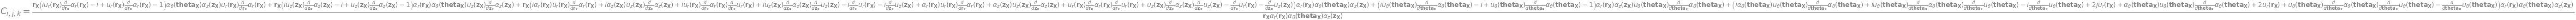

In [5]:
discretized_LHS_full = dfdt # Time derivative, always present
discretized_LHS_full += vr_dfdr # Radial term of v.grad(f)
discretized_LHS_full += 1/X.r * r_vtheta_dfdtheta # Azimuthal term of v.grad(f)
discretized_LHS_full += vz_dfdz # Axial term of v.grad(f)
discretized_LHS_full += Er_dfdv_r + Bz_vtheta_dfdv_r + Btheta_vz_dfdv_r + centripetal_term # Radial term of a.gradv(f)
discretized_LHS_full += Etheta_dfdv_theta + Br_vz_dfdv_theta + Bz_vr_dfdv_theta + coriolis_term # Azimuthal term of a.gradv(f)
discretized_LHS_full += Ez_dfdv_z + Br_vtheta_dfdv_z + Btheta_vr_dfdv_z # Axial term of a.gradv(f)
discretized_LHS_full = sym.expand(discretized_LHS_full)

eval_at = [i, j, k]
print("In the following equations, the RHS is the coefficient beloning to the term on the LHS")
display(sym.Eq(Coefficient(eval_at[0], eval_at[1], eval_at[2], X.r, X.theta, X.z, t), discretized_LHS_full.coeff(Coefficient(eval_at[0], eval_at[1], eval_at[2], X.r, X.theta, X.z, t)).simplify(doit=False)))
display(sym.Eq(Coefficient(eval_at[0], eval_at[1], eval_at[2], X.r, X.theta, X.z, t).diff(X.r), discretized_LHS_full.coeff(Coefficient(eval_at[0], eval_at[1], eval_at[2], X.r, X.theta, X.z, t).diff(X.r)).simplify(doit=False)))
display(sym.Eq(Coefficient(eval_at[0], eval_at[1], eval_at[2], X.r, X.theta, X.z, t).diff(X.theta), discretized_LHS_full.coeff(Coefficient(eval_at[0], eval_at[1], eval_at[2], X.r, X.theta, X.z, t).diff(X.theta)).simplify(doit=False)))
display(sym.Eq(Coefficient(eval_at[0], eval_at[1], eval_at[2], X.r, X.theta, X.z, t).diff(X.z), discretized_LHS_full.coeff(Coefficient(eval_at[0], eval_at[1], eval_at[2], X.r, X.theta, X.z, t).diff(X.z)).simplify(doit=False)))

# Simplified system (1D1V, Xz-Vz)
This is a simplification of the system in only 1D1V in z-direction with spatially constant u and alpha, as well as no B-field. This is suitable for the TSI test case.

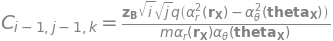

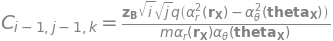

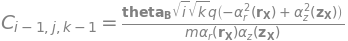

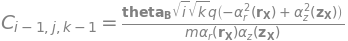

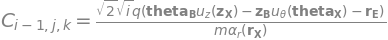

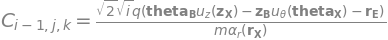

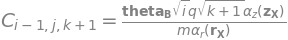

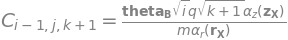

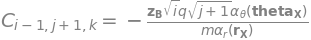

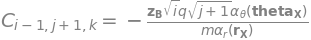

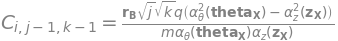

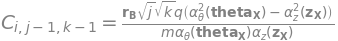

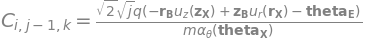

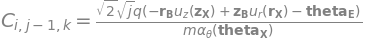

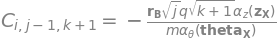

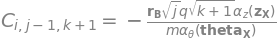

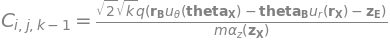

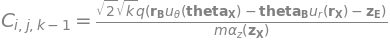

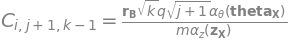

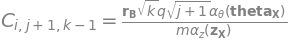

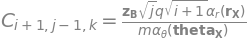

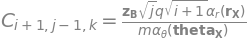

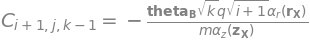

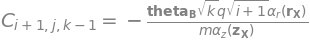

In [18]:
discretized_LHS_1d1v_z = dfdt # Time derivative, always present
# discretized_LHS_1d1v_z += vr_dfdr # Radial term of v.grad(f)
# discretized_LHS_1d1v_z += 1/X.r * r_vtheta_dfdtheta # Azimuthal term of v.grad(f) -->
discretized_LHS_1d1v_z += vz_dfdz # Axial term of v.grad(f)
discretized_LHS_1d1v_z += Er_dfdv_r + Bz_vtheta_dfdv_r + Btheta_vz_dfdv_r #+ centripetal_term # Radial term of a.gradv(f)
discretized_LHS_1d1v_z += Etheta_dfdv_theta + Br_vz_dfdv_theta + Bz_vr_dfdv_theta #+ coriolis_term # Azimuthal term of a.gradv(f) -->
discretized_LHS_1d1v_z += Ez_dfdv_z + Br_vtheta_dfdv_z + Btheta_vr_dfdv_z # Axial term of a.gradv(f)

# Make simplifications (no B, spatially constant u, alpha)
# discretized_LHS_1d1v_z = discretized_LHS_1d1v_z.subs(B.r, 0)
# discretized_LHS_1d1v_z = discretized_LHS_1d1v_z.subs(B.theta, 0)
# discretized_LHS_1d1v_z = discretized_LHS_1d1v_z.subs(B.z, 0)
discretized_LHS_1d1v_z = discretized_LHS_1d1v_z.subs(alpha_r.diff(X.r), 0)
discretized_LHS_1d1v_z = discretized_LHS_1d1v_z.subs(alpha_theta.diff(X.theta), 0)
discretized_LHS_1d1v_z = discretized_LHS_1d1v_z.subs(alpha_z.diff(X.z), 0)
discretized_LHS_1d1v_z = discretized_LHS_1d1v_z.subs(u_r.diff(X.r), 0)
discretized_LHS_1d1v_z = discretized_LHS_1d1v_z.subs(u_theta.diff(X.theta), 0)
discretized_LHS_1d1v_z = discretized_LHS_1d1v_z.subs(u_z.diff(X.z), 0)
discretized_LHS_1d1v_z = sym.expand(discretized_LHS_1d1v_z)


# display(discretized_LHS_1d1v_z)
for i_off in range(-10, 10):
    for j_off in range(-10, 10):
        for k_off in range(-10, 10):
            coeff = discretized_LHS_1d1v_z.coeff(Coefficient(i+i_off, j+j_off, k+k_off, X.r, X.theta, X.z, t)).simplify(doit=False)
            diff_coeff_r = discretized_LHS_1d1v_z.coeff(Coefficient(i+i_off, j+j_off, k+k_off, X.r, X.theta, X.z, t).diff(X.r)).simplify(doit=False)
            diff_coeff_theta = discretized_LHS_1d1v_z.coeff(Coefficient(i+i_off, j+j_off, k+k_off, X.r, X.theta, X.z, t).diff(X.theta)).simplify(doit=False)
            diff_coeff_z = discretized_LHS_1d1v_z.coeff(Coefficient(i+i_off, j+j_off, k+k_off, X.r, X.theta, X.z, t).diff(X.z)).simplify(doit=False)
            if coeff != 0: display(sym.Eq(Coefficient(i+i_off, j+j_off, k+k_off, X.r, X.theta, X.z, t), coeff))
            if diff_coeff_r != 0: display(sym.Eq(Coefficient(i+i_off, j+j_off, k+k_off, X.r, X.theta, X.z, t), coeff))
            if diff_coeff_theta != 0: display(sym.Eq(Coefficient(i+i_off, j+j_off, k+k_off, X.r, X.theta, X.z, t), coeff))
            if diff_coeff_z != 0: display(sym.Eq(Coefficient(i+i_off, j+j_off, k+k_off, X.r, X.theta, X.z, t), coeff))
print("All terms printed!")
